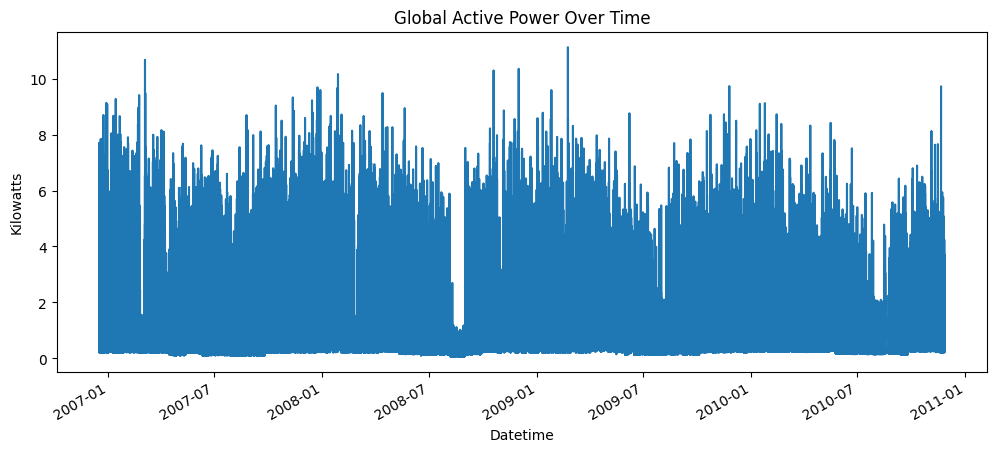

In [ ]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 📌 Step 2: Load Dataset
# Upload your dataset or download directly from UCI
url = '/content/drive/MyDrive/household_power_consumption.txt'
df = pd.read_csv(url, sep=';', low_memory=False)

# 📌 Step 3: Data Cleaning
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert to correct types
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 📌 Step 4: DateTime Parsing
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H:%M:%S")
df.set_index('Datetime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)

# 📌 Step 5: Feature Engineering
df['hour'] = df.index.hour
df['day'] = df.index.day
df['weekday'] = df.index.weekday

# 📌 Step 6: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,5))
df['Global_active_power'].plot(title='Global Active Power Over Time')
plt.ylabel('Kilowatts')
plt.show()



hour
0     0.659434
1     0.539325
2     0.480621
3     0.444866
4     0.443847
5     0.453674
6     0.791600
7     1.502246
8     1.461016
9     1.331645
10    1.260627
11    1.245822
12    1.207075
13    1.144532
14    1.082839
15    0.990760
16    0.948905
17    1.055109
18    1.326451
19    1.733335
20    1.899064
21    1.877697
22    1.412615
23    0.902142
Name: Global_active_power, dtype: float64


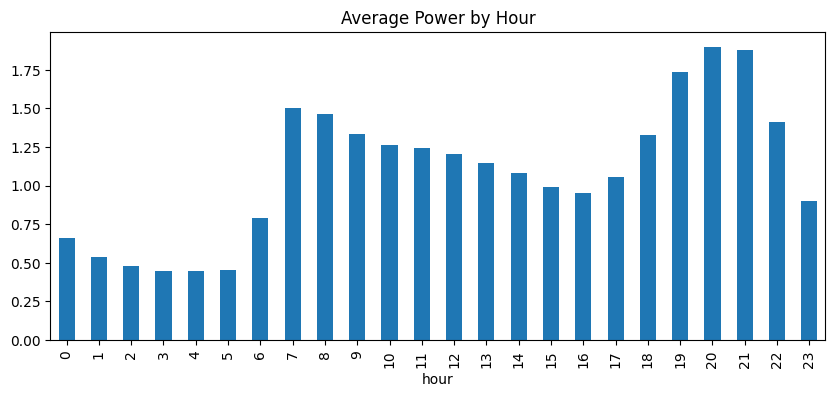

In [19]:
# Daily average power usage
df['daily_avg_power'] = df['Global_active_power'].rolling('1D').mean()

# Weekly average
df['weekly_avg_power'] = df['Global_active_power'].rolling('7D').mean()

# Peak usage hour - optional visual analysis
hourly_avg = df.groupby('hour')['Global_active_power'].mean()
hourly_avg.plot(kind='bar', figsize=(10,4), title="Average Power by Hour")

# Group by hour and calculate mean power usage
hourly_usage = df.groupby('hour')['Global_active_power'].mean()

# Display average usage for each hour
print(hourly_usage)


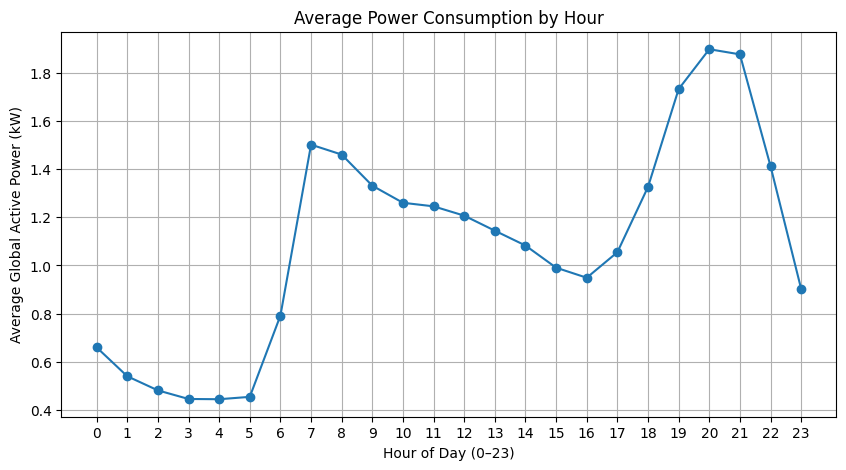

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(hourly_usage.index, hourly_usage.values, marker='o')
plt.title("Average Power Consumption by Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Global Active Power (kW)")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


Average Global Active Power by Weekday:
weekday
Monday       0.999546
Tuesday      1.069796
Wednesday    1.082588
Thursday     0.981809
Friday       1.043394
Saturday     1.248335
Sunday       1.220188
Name: Global_active_power, dtype: float64


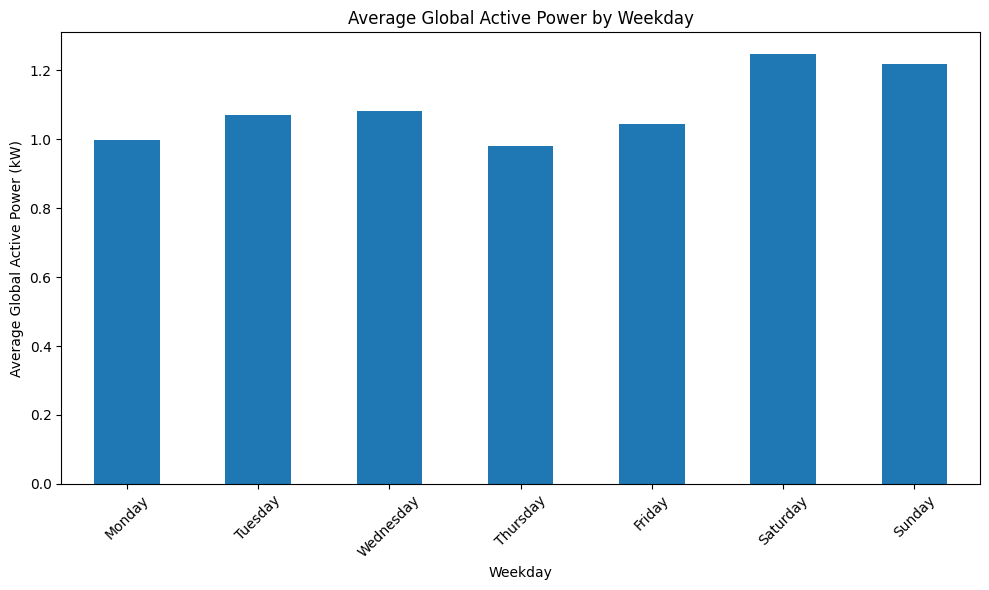

In [15]:
# Group by weekday and calculate the mean of Global_active_power
average_power_by_weekday = df.groupby('weekday')['Global_active_power'].mean()

# Map weekday numbers to names for better readability
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_power_by_weekday.index = average_power_by_weekday.index.map(weekday_map)

# Print the result
print("Average Global Active Power by Weekday:")
print(average_power_by_weekday)

# Optional: Visualize the average power by weekday
plt.figure(figsize=(10, 6))
average_power_by_weekday.plot(kind='bar')
plt.title('Average Global Active Power by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Global Active Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

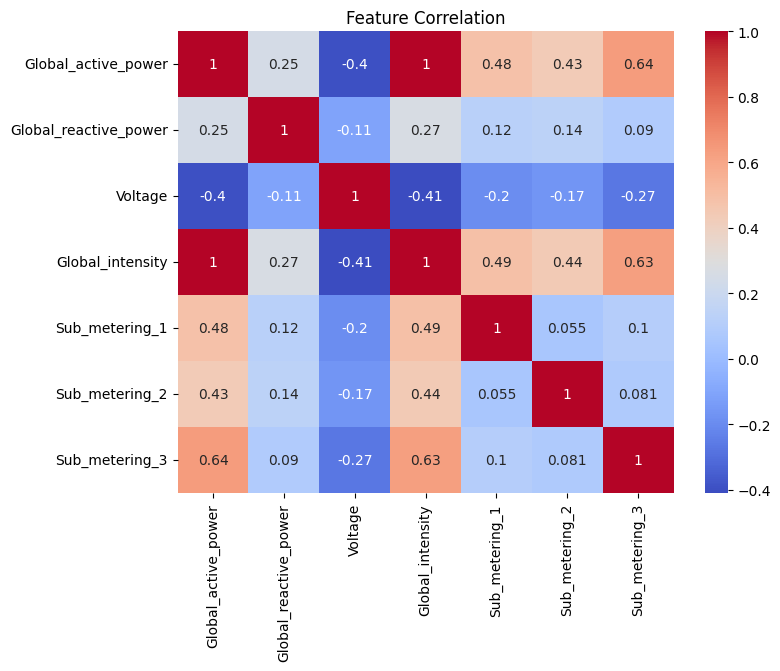

In [ ]:

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [ ]:

# 📌 Step 7: Train-Test Split
features = ['hour', 'day', 'weekday', 'Global_reactive_power', 'Voltage', 'Global_intensity']
X = df[features]
y = df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 8: Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# 📌 Step 9: Evaluate the Model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE: {mae:.4f}")
print(f"✅ R² Score: {r2:.4f}")

✅ RMSE: 0.0327
✅ MAE: 0.0152
✅ R² Score: 0.9990


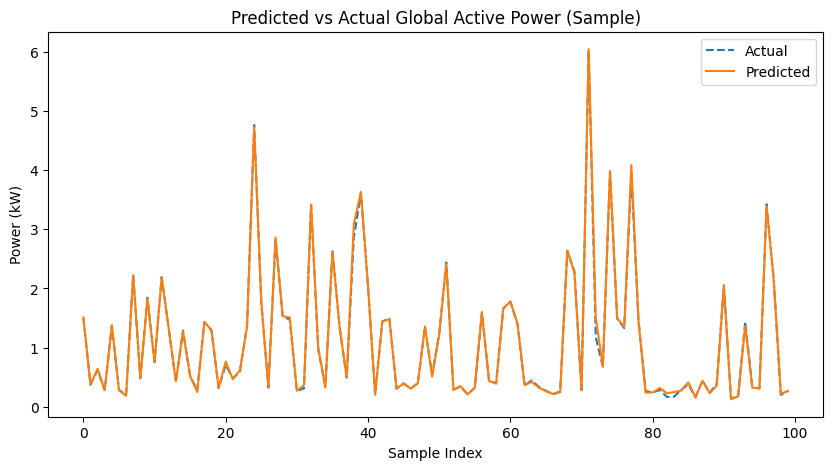

In [ ]:

# 📌 Step 10: Visualize Predictions
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', linestyle='--')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title("Predicted vs Actual Global Active Power (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Power (kW)")
plt.show()


In [ ]:
#1. Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("📘 Linear Regression:")
print(f"RMSE: {rmse_lr:.4f}, MAE: {mae_lr:.4f}, R²: {r2_lr:.4f}")


📘 Linear Regression:
RMSE: 0.0432, MAE: 0.0286, R²: 0.9983


In [ ]:
#2. Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Features and Target Selection
features = ['hour', 'day', 'weekday', 'Global_reactive_power', 'Voltage', 'Global_intensity']
X = df[features]
y = df['Global_active_power']

# Split dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest:")
print(f"RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")


🌲 Random Forest:
RMSE: 0.0327, MAE: 0.0152, R²: 0.9990


In [ ]:
#3. Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("📈 Gradient Boosting:")
print(f"RMSE: {rmse_gb:.4f}, MAE: {mae_gb:.4f}, R²: {r2_gb:.4f}")


📈 Gradient Boosting:
RMSE: 0.0376, MAE: 0.0223, R²: 0.9987


In [ ]:
#4. Neural Network (MLPRegressor)

from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("🧠 Neural Network:")
print(f"RMSE: {rmse_nn:.4f}, MAE: {mae_nn:.4f}, R²: {r2_nn:.4f}")


🧠 Neural Network:
RMSE: 0.0529, MAE: 0.0377, R²: 0.9975


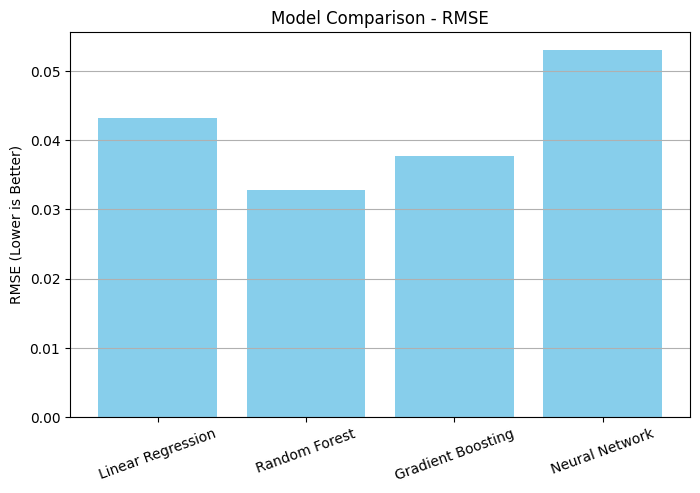

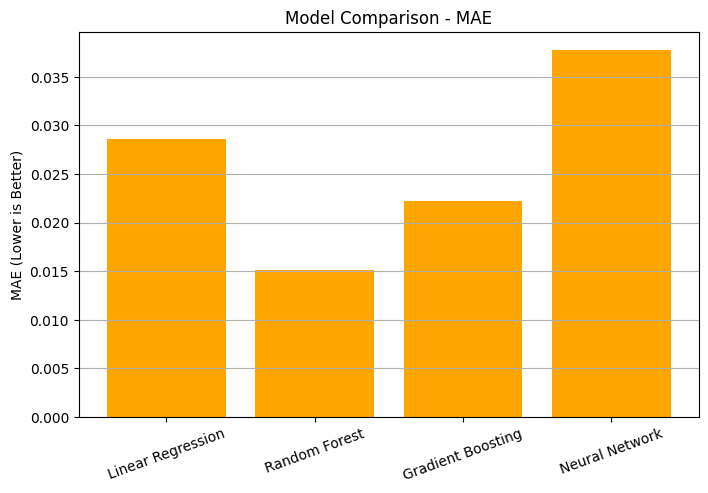

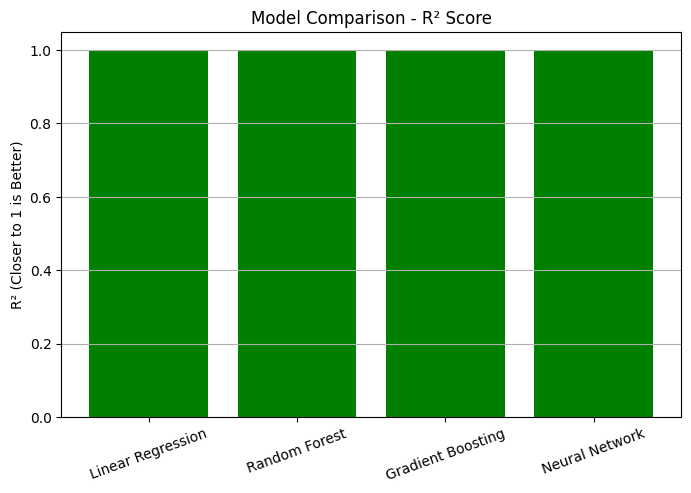

In [ ]:
#Create Comparison Graph

import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']

# Metrics (replace with your actual values from previous steps)
rmse_values = [rmse_lr, rmse_rf, rmse_gb, rmse_nn]
mae_values = [mae_lr, mae_rf, mae_gb, mae_nn]
r2_values = [r2_lr, r2_rf, r2_gb, r2_nn]

# 🔷 Plot RMSE
plt.figure(figsize=(8,5))
plt.bar(models, rmse_values, color='skyblue')
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE (Lower is Better)")
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()

# 🔷 Plot MAE
plt.figure(figsize=(8,5))
plt.bar(models, mae_values, color='orange')
plt.title("Model Comparison - MAE")
plt.ylabel("MAE (Lower is Better)")
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()

# 🔷 Plot R² Score
plt.figure(figsize=(8,5))
plt.bar(models, r2_values, color='green')
plt.title("Model Comparison - R² Score")
plt.ylabel("R² (Closer to 1 is Better)")
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd

model_metrics = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network'],
    'RMSE':  [rmse_lr, rmse_rf, rmse_gb, rmse_nn],
    'MAE':   [mae_lr, mae_rf, mae_gb, mae_nn],
    'R2':    [r2_lr, r2_rf, r2_gb, r2_nn]
}

df_results = pd.DataFrame(model_metrics)

# Display table
display(df_results)

# Highlight best
def highlight_best(s, is_max=True):
    is_best = s == s.max() if is_max else s == s.min()
    return ['background-color: green' if v else '' for v in is_best]

styled_table = df_results.style\
    .apply(highlight_best, subset=['RMSE'], is_max=False)\
    .apply(highlight_best, subset=['MAE'], is_max=False)\
    .apply(highlight_best, subset=['R2'], is_max=True)

styled_table


,Model,RMSE,MAE,R2
0,Linear Regression,0.043221,0.028618,0.998338
1,Random Forest,0.032747,0.015157,0.999046
2,Gradient Boosting,0.037631,0.022255,0.998740
3,Neural Network,0.052941,0.037713,0.997506


,Model,RMSE,MAE,R2
0,Linear Regression,0.043221,0.028618,0.998338
1,Random Forest,0.032747,0.015157,0.999046
2,Gradient Boosting,0.037631,0.022255,0.998740
3,Neural Network,0.052941,0.037713,0.997506


/tmp/ipython-input-22-3826784997.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


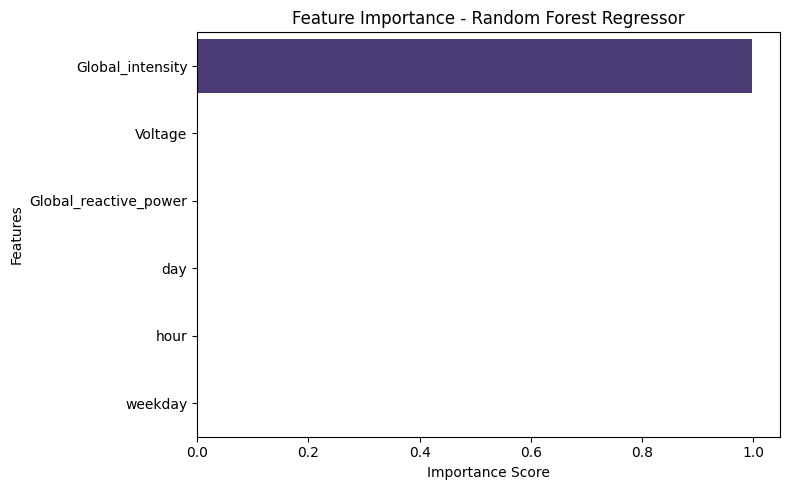

In [22]:
# Feature importance from Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names and importances
feature_names = X.columns
importances = rf.feature_importances_

# Create DataFrame for plotting
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title("Feature Importance - Random Forest Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
